# Projet Climatologie


## Liste des requêtes


- Les températures moyennes françaises de 1995 à 2019.

- L'évolution moyenne de la température chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagrammes sur un seul affichage).

- Le classement graphique des pays les plus chauds au monde.

- Le classement graphique des pays les plus froids au monde.

- L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique.

- L'évolution de la température moyenne de la ville de Paris.

- La température moyenne de chaque pays sur une carte sur la période 2010-2019.



## Structure du jeu de données source

Region / Country / State / City / Month / Day / Year / AvgTemperature

## Import des librairies

In [1]:
# IPython extension reloading modules before user enters code.
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.credentials import Credentials as cr
import src.split_datas as sd

## Nettoyage du jeu de données

In [2]:
global_temperatures = pd.read_csv("./data/RAW/temperatures.csv", delimiter = ',')

In [ ]:
global_temperatures.describe()

In [3]:
# Conversion des degrés Fahrenheit en degrés Celsius.
global_temperatures['AvgTemperature'] = (global_temperatures['AvgTemperature'] - 32) / 1.8

In [4]:
# Nettoyage des données aberrantes.
global_temperatures = global_temperatures[global_temperatures['AvgTemperature'] > -72]

In [5]:
# Nous n'avons pas besoin de l'année 2020 dans ce projet.
global_temperatures = global_temperatures[global_temperatures['Year'] <= 2019]

In [6]:
global_temperatures['Region'][global_temperatures['Region'] == 'North America'] = 'NorthAmerica'
global_temperatures['Region'][global_temperatures['Region'] == 'South/Central America & Carribean'] = 'SouthCentralAmericaCarribean'
global_temperatures['Region'][global_temperatures['Region'] == 'Middle East'] = 'MiddleEast'
global_temperatures['Region'][global_temperatures['Region'] == 'Australia/South Pacific'] = 'AustraliaSouthPacific'

In [8]:
global_temperatures.to_csv("./data/RAW/temperatures_filtre.csv")

## Séparation des données

In [10]:
sd.split_datas(cr.TEMPERATURES_FILTRE, 'Country')

c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Algeria.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Burundi.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Benin.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Central African Republic.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Congo.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Egypt.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Ethiopia.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Gabon.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Gambia.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Guinea.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Guinea-Bissau.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Country\Ivory Coast.csv
c:\Users\utilisate

In [11]:
sd.split_datas(cr.TEMPERATURES_FILTRE, 'Region')

c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\Africa.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\Asia.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\AustraliaSouthPacific.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\Europe.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\MiddleEast.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\NorthAmerica.csv
c:\Users\utilisateur\Desktop\Climatologie\data\CURATED\Region\SouthCentralAmericaCarribean.csv


## Les températures moyennes françaises de 1995 à 2019

In [12]:
local_france = pd.read_csv("./data/CURATED/Country/France.csv", sep=',', encoding='utf-8')

In [13]:
local_france = local_france.drop('Unnamed: 0', axis = 1)

In [14]:
local_france[['Region', 'Country', 'State', 'City']] = local_france[['Region', 'Country', 'State', 'City']].astype('string')

In [15]:
local_france.dtypes

Region             string
Country            string
State              string
City               string
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [16]:
local_france = local_france[['Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

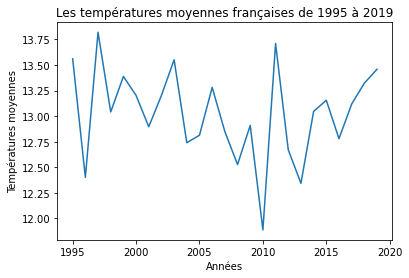

In [17]:
plt.plot(local_france['AvgTemperature'])
plt.xlabel('Années')
plt.ylabel('Températures moyennes')
plt.title('Les températures moyennes françaises de 1995 à 2019')
plt.show()

In [18]:
# local_bordeaux['Full Date'] = local_bordeaux['Year'].map(str) + "-" + local_bordeaux['Month'].map(str) + "-" + local_bordeaux['Day'].map(str)

## L'évolution moyenne de la température chaque mois de l'année de chaque région du globe